In [2]:
################################################################################################################################
############################## PRACTICA NLP: Jordi Ortega - IA2 ################################################################
################################################################################################################################

# 0. Ejercicio 2. Etapa de preprocesado de texto

# 1. Cargamos el dataset -> Cargamos el dataset ya balanceado
# 2. Preprocesado -> Aplicamos diversas decisiones de procesamiento del texto
# 3. Función Preprocesado -> Anidamos y ajustamos las acciones del paso anterior en un pipeline
# 4. Función Preprocesado Trigramas -> Tokenizamos mediante trigramas
# 5. Conclusiones

In [3]:
################################################################################################################################
############################## CARGAMOS DATASET ################################################################################
################################################################################################################################

In [4]:
# Data Source: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews
# 2023 version
# Bridging Language and Items for Retrieval and Recommendation
# Yupeng Hou, Jiacheng Li, Zhankui He, An Yan, Xiusi Chen, Julian McAuley

In [5]:
import pandas as pd
df = pd.read_csv('sports_outdoors_dataset.csv')
df.head(5)

,sentiment,title,review,sentiment_label
0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0
1,5.0,Great Lures,Nice quality lures heavy duty,0
2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0
3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0
4,5.0,Great box,This mini Tackle box comes with so many fishin...,0


In [6]:
################################################################################################################################
############################## PREPROCESADO ####################################################################################
################################################################################################################################

In [7]:
# Leemos algunas reviews
for i, review in enumerate(df['review'].head(5), start=1):
    print(f"Review {i}:\n{review}\n")

Review 1:
Ordered a few bags, put some in mine  and my children's glove boxes so we're are prepared for messes from my grandkids lol.<br />Put some in camping and hiking gear too. We all tried them on an outing that included picnic lunch and hiking. Very handy they are as good as advertised. Tiny yet sturdy, and nice size when opened for use. It takes very little water to get them to unfold and open.<br />PS my grandkids love them sho much that they have  been using them to clean. Maybe you will get that addressed

Review 2:
Nice quality lures heavy duty

Review 3:
Lost mine in a move. Perfect for what I needed.

Review 4:
Great quality.  Adjustable from 22lbs-88lbs of tension.

Review 5:
This mini Tackle box comes with so many fishing accessories To make your fishing experience fun. Great to have handy or to give us a gift for any age Fisherman



In [8]:
import spacy

In [9]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
# Cargamos el modelo de spacy especializado en reviews web
nlp = spacy.load("en_core_web_sm")

# Tokenizamos una review por palabra para ver acciones de 'limpieza' a tener en cuenta en el preprocesado
doc = nlp("I made this into a small purse. Perfect for most of my daily carrying. I made a paracord cross body strap and used carbiner on each side to attach it. Then I was able to add on a smaller molle bag for days I wanted additional carrying capacity.")
tokens = [token.text for token in doc]
print(tokens)

['I', 'made', 'this', 'into', 'a', 'small', 'purse', '.', 'Perfect', 'for', 'most', 'of', 'my', 'daily', 'carrying', '.', 'I', 'made', 'a', 'paracord', 'cross', 'body', 'strap', 'and', 'used', 'carbiner', 'on', 'each', 'side', 'to', 'attach', 'it', '.', 'Then', 'I', 'was', 'able', 'to', 'add', 'on', 'a', 'smaller', 'molle', 'bag', 'for', 'days', 'I', 'wanted', 'additional', 'carrying', 'capacity', '.']


In [11]:
# Confirmamos tamaño y la no existencia de valores nulos
print(df.shape)
df.isnull().sum()

(5000, 4)


,0
sentiment,0
title,0
review,0
sentiment_label,0


In [12]:
import re

# Eliminamos, si los hubiera, documentos duplicados
df = df.dropna().drop_duplicates()

# Creamos la columna 'review_clean' sobre la que iremos aplicando las técnicas de preprocesado
# Aplicamos 'regular expresions', minúsculas y eliminación de espacios en la variable review
# mantenemos los apostrofes porque en inglés tienen un significado gramatical
df['review_clean'] = [re.sub("[^A-Za-z']+", ' ', str(row)).lower().strip() for row in df['review']]

In [13]:
# Aplicamos lemmatización con NLTK
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

# Usaremos wordnet como base de datos para encontrar el lema de las palabras
lemmatizer = WordNetLemmatizer()
df['review_clean'] = df['review_clean'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(x)])
)

for i, review in enumerate(df['review'].head(5), start=1):
    print(f"Review {i}:\n{review}\n")
for i, review in enumerate(df['review_clean'].head(5), start=1):
    print(f"Review {i}:\n{review}\n")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Review 1:
Ordered a few bags, put some in mine  and my children's glove boxes so we're are prepared for messes from my grandkids lol.<br />Put some in camping and hiking gear too. We all tried them on an outing that included picnic lunch and hiking. Very handy they are as good as advertised. Tiny yet sturdy, and nice size when opened for use. It takes very little water to get them to unfold and open.<br />PS my grandkids love them sho much that they have  been using them to clean. Maybe you will get that addressed

Review 2:
Nice quality lures heavy duty

Review 3:
Lost mine in a move. Perfect for what I needed.

Review 4:
Great quality.  Adjustable from 22lbs-88lbs of tension.

Review 5:
This mini Tackle box comes with so many fishing accessories To make your fishing experience fun. Great to have handy or to give us a gift for any age Fisherman

Review 1:
ordered a few bag put some in mine and my child 's glove box so we 're are prepared for mess from my grandkids lol br put some in c

In [14]:
# Contamos la aparición de "no" en todo el corpus para valorar la importancia de la 'negación' en nuestro dataset
total_no = sum(df['review'].str.count(r'\bno\b', flags=re.IGNORECASE))
print(f"La palabra 'no' aparece un total de {total_no} veces en el corpus.")

La palabra 'no' aparece un total de 791 veces en el corpus.


In [15]:
# Contamos cuántos documentos contienen la palabra 'no' al menos una vez
documents_with_no = df['review'].str.contains(r'\bno\b', flags=re.IGNORECASE, na=False)

# Contamos cuántos documentos son 'True' (es decir, contienen 'no')
count_documents_with_no = documents_with_no.sum()
print(f"El número de documentos que contienen la palabra 'no' es: {count_documents_with_no}")

El número de documentos que contienen la palabra 'no' es: 619


In [16]:
# Eliminamos palabras con una longitud menor o igual a 2. Mantenemos "no" porque puede ser importante en los n-gramas.
def clean_short_words(text):
    words = text.split()
    cleaned_words = [word for word in words if len(word) > 2 or word.lower() == "no"]
    return " ".join(cleaned_words)

df['review_clean'] = df['review_clean'].astype(str).apply(clean_short_words)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=5597001df84436bc7e9b15bf9b6f7eb806ae963dfc9eddba9d360ff931ae7661
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


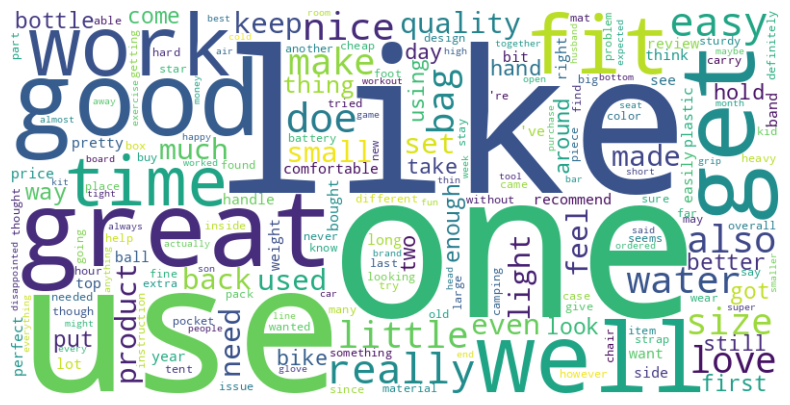

In [17]:
# Haremos un mix de las 2 nubes de palabras anteriores, es decir, especificas del proyecto y genéricas de la librería stop_words

from collections import Counter
from wordcloud import WordCloud
import string
!pip install unidecode
from unidecode import unidecode
!pip install stop_words
from stop_words import get_stop_words
import string
import matplotlib.pyplot as plt
from stop_words import get_stop_words

sw_library = set(get_stop_words(language='en'))
sw_manual = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves",
    "you", "your", "yours", "yourself", "yourselves", "he", "him",
    "his", "himself", "she", "her", "hers", "herself", "it", "its",
    "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing",
    "a", "an", "the", "and", "but", "if", "or", "because", "as",
    "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before",
    "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further",
    "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most",
    "other", "some", "such", "only", "own",
    "same", "so", "than", "too", "very", "s", "t", "can", "will",
    "just", "don", "should", "now","br", "sport", "outdoor", "sports", "outdoors","n't"
])

stopwords_combined = sw_library.union(sw_manual)

def clean_text(text):
    if pd.isna(text):
        return ""
    words = [word for word in text.split() if word.lower() not in stopwords_combined]
    return " ".join(words)  # Reconstruir el texto limpio

df['review_clean'] = df['review_clean'].astype(str).apply(clean_text)
text_cleaned = " ".join(df['review_clean'])
word_counts = Counter(text_cleaned.split())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# De esta nube de palabras observamos que las principales palabras hacen referencia a adjetivos que califican el agrado o no (like, good, nice...) de
# una adquisición (purchase, bike, bag...) de la que valoran sus atributos (comfortable, size, fit..)

In [19]:
# mediante Tf-idf estudiamos la importancia de una palabra dentro del corpus
from sklearn.feature_extraction.text import TfidfVectorizer

# Contamos tokens antes del filtrado
df['original_token_count'] = df['review'].apply(lambda x: len(x.split()))

# Limitamos a 1000 los tokens que el vectorizador incluirá
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['review_clean'])

tfidf_tokens = vectorizer.get_feature_names_out()
tfidf_values = X.toarray()

# Definimos el umbral para que un token en cada documento sea aceptado o descartado
threshold = 0.1
selected_tokens = set()

for doc_values in tfidf_values:
    for token, value in zip(tfidf_tokens, doc_values):
        if value > threshold:
            selected_tokens.add(token)

# Actualizamos el corpus basado en los tokens seleccionados
def filter_tokens(text, allowed_tokens):
    words = text.split()
    filtered_words = [word for word in words if word in allowed_tokens]
    return " ".join(filtered_words)

df['review_clean'] = df['review_clean'].apply(lambda x: filter_tokens(x, selected_tokens))

# Contamos tokens después del filtrado
df['filtered_token_count'] = df['review_clean'].apply(lambda x: len(x.split()))

print(df[['review', 'original_token_count', 'review_clean', 'filtered_token_count']])


                                                 review  original_token_count  \
0     Ordered a few bags, put some in mine  and my c...                    95   
1                         Nice quality lures heavy duty                     5   
2       Lost mine in a move. Perfect for what I needed.                    10   
3     Great quality.  Adjustable from 22lbs-88lbs of...                     7   
4     This mini Tackle box comes with so many fishin...                    30   
...                                                 ...                   ...   
4995  This football display case is nice, however wh...                    64   
4996  This is a great bar. I do find myself wishing ...                    17   
4997  This set includes:<br />- Six (6) all weather ...                   406   
4998  The towel does cool your neck and when it warm...                   284   
4999         These do the trick in protecting my woods.                     8   

                           

In [20]:
total_tokens_before = df['review'].apply(lambda x: len(x.split())).sum()
total_tokens_after = df['review_clean'].apply(lambda x: len(x.split())).sum()
print(total_tokens_before)
print(total_tokens_after)

353707
123499


In [21]:
df.head()

,sentiment,title,review,sentiment_label,review_clean,original_token_count,filtered_token_count
0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0,ordered bag put mine child glove box lol put c...,95,36
1,5.0,Great Lures,Nice quality lures heavy duty,0,nice quality heavy duty,5,4
2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0,lost mine move perfect needed,10,5
3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0,great quality adjustable tension,7,4
4,5.0,Great box,This mini Tackle box comes with so many fishin...,0,box come many fishing make fishing experience ...,30,13


In [22]:
# Tokenizamos todo el corpus
df['review_clean'] = df['review_clean'].apply(lambda x: [token.text for token in nlp(x)])

In [23]:
print(df.shape)
df.isnull().sum()

(4953, 7)


,0
sentiment,0
title,0
review,0
sentiment_label,0
review_clean,0
original_token_count,0
filtered_token_count,0


In [24]:
df.head()

,sentiment,title,review,sentiment_label,review_clean,original_token_count,filtered_token_count
0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0,"[ordered, bag, put, mine, child, glove, box, l...",95,36
1,5.0,Great Lures,Nice quality lures heavy duty,0,"[nice, quality, heavy, duty]",5,4
2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0,"[lost, mine, move, perfect, needed]",10,5
3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0,"[great, quality, adjustable, tension]",7,4
4,5.0,Great box,This mini Tackle box comes with so many fishin...,0,"[box, come, many, fishing, make, fishing, expe...",30,13


In [25]:
# Contamos cuántos registros tienen una lista vacía en la columna 'review_clean'
empty_list_count = df['review_clean'].apply(lambda x: len(x) == 0).sum()

print(f"Cantidad de registros con lista vacía: {empty_list_count}")

Cantidad de registros con lista vacía: 35


In [26]:
df = df[df['review_clean'].apply(lambda x: len(x) > 0)]

In [27]:
df.head()

,sentiment,title,review,sentiment_label,review_clean,original_token_count,filtered_token_count
0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0,"[ordered, bag, put, mine, child, glove, box, l...",95,36
1,5.0,Great Lures,Nice quality lures heavy duty,0,"[nice, quality, heavy, duty]",5,4
2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0,"[lost, mine, move, perfect, needed]",10,5
3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0,"[great, quality, adjustable, tension]",7,4
4,5.0,Great box,This mini Tackle box comes with so many fishin...,0,"[box, come, many, fishing, make, fishing, expe...",30,13


In [28]:
################################################################################################################################
############################## FUNCIÓN PREPROCESADO ############################################################################
################################################################################################################################

In [29]:
df = pd.read_csv('sports_outdoors_dataset.csv')

In [30]:
# Pipeline de preprocesado
def text_normalizer_review(review_series):
    # Eliminamos nulos y duplicados
    review_series = review_series.dropna().drop_duplicates()

    # Limpiamos carácteres
    review_series = review_series.apply(lambda x: re.sub("[^A-Za-z']+", ' ', str(x)).lower().strip())

    # Lematizamos
    review_series = review_series.apply(lambda x: ' '.join([lemmatizer.lemmatize(token) for token in word_tokenize(x)]))

    # Eliminamos tokens cortos (mantenemos el "no")
    def clean_short_words(tokens):
        return [word for word in tokens if len(word) > 2 or word.lower() == "no"]
    review_series = review_series.apply(lambda x: ' '.join(clean_short_words(x.split())))

    # Eliminamos stopwords
    def remove_stopwords(tokens):
        return [word for word in tokens if word.lower() not in stopwords_combined]
    review_series = review_series.apply(lambda x: ' '.join(remove_stopwords(x.split())))

    # Filtramos tokens basandonos en tf-idf
    def filter_tokens(tokens, allowed_tokens):
        return [word for word in tokens if word in allowed_tokens]
    review_series = review_series.apply(lambda x: ' '.join(filter_tokens(x.split(), selected_tokens)))

    return review_series

In [31]:
df['review_clean'] = text_normalizer_review(df['review'])

In [32]:
df.head()

,sentiment,title,review,sentiment_label,review_clean
0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0,ordered bag put mine child glove box lol put c...
1,5.0,Great Lures,Nice quality lures heavy duty,0,nice quality heavy duty
2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0,lost mine move perfect needed
3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0,great quality adjustable tension
4,5.0,Great box,This mini Tackle box comes with so many fishin...,0,box come many fishing make fishing experience ...


In [33]:
df['review_clean'] = df['review_clean'].fillna('')
# Tokenizamos todo el corpus
df['review_clean'] = df['review_clean'].apply(lambda x: [token.text for token in nlp(x)])

In [34]:
df.head()

,sentiment,title,review,sentiment_label,review_clean
0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0,"[ordered, bag, put, mine, child, glove, box, l..."
1,5.0,Great Lures,Nice quality lures heavy duty,0,"[nice, quality, heavy, duty]"
2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0,"[lost, mine, move, perfect, needed]"
3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0,"[great, quality, adjustable, tension]"
4,5.0,Great box,This mini Tackle box comes with so many fishin...,0,"[box, come, many, fishing, make, fishing, expe..."


In [35]:
# Contamos cuántos registros tienen una lista vacía en la columna 'review_clean'
empty_list_count = df['review_clean'].apply(lambda x: len(x) == 0).sum()

print(f"Cantidad de registros con lista vacía: {empty_list_count}")

Cantidad de registros con lista vacía: 114


In [36]:
# Filtramos las filas donde la columna 'review_clean' tiene una lista vacía
df = df[df['review_clean'].apply(lambda x: len(x) > 0)]

In [37]:
print(df.shape)
df.isnull().sum()

(4886, 5)


,0
sentiment,0
title,0
review,0
sentiment_label,0
review_clean,0


In [38]:
df.to_csv('./df_sports_outdoors_unigram.csv')

In [39]:
################################################################################################################################
############################## FUNCION PREPROCESADO TRIGRAMAS ##################################################################
################################################################################################################################

In [40]:
# Con el objetivo de que los tokens tengan contexto local, convertiremos los tokens creados en la primera función en trigramas.
# Ante la opción de hacer trigramas y luego calcular el TF-IDF o mantener el ouput anterior y luego crear los trigramas hemos obtado
# por la segunda opción:
# - De esta forma hemos reducido bastante el ruido en el paso anterior
# - Computacionalmente es más eficiente
# - En el caso que nos aplica creo que los bigramas dependen directamente de la importancia de las palabras que lo componen (en este tipo de reviews no esperamos
# bigramas con significado independiente tipo 'machine learning')

In [41]:
from nltk.util import ngrams

# Generamos los trigramas
def generate_trigrams(tokens):
    return list(ngrams(tokens, 3))

df['review_clean_trigram'] = df['review_clean'].apply(generate_trigrams)

df.head()

,sentiment,title,review,sentiment_label,review_clean,review_clean_trigram
0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0,"[ordered, bag, put, mine, child, glove, box, l...","[(ordered, bag, put), (bag, put, mine), (put, ..."
1,5.0,Great Lures,Nice quality lures heavy duty,0,"[nice, quality, heavy, duty]","[(nice, quality, heavy), (quality, heavy, duty)]"
2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0,"[lost, mine, move, perfect, needed]","[(lost, mine, move), (mine, move, perfect), (m..."
3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0,"[great, quality, adjustable, tension]","[(great, quality, adjustable), (quality, adjus..."
4,5.0,Great box,This mini Tackle box comes with so many fishin...,0,"[box, come, many, fishing, make, fishing, expe...","[(box, come, many), (come, many, fishing), (ma..."


In [42]:
# Contamos cuántos registros tienen una lista vacía en la columna 'review_clean'
empty_list_count = df['review_clean_trigram'].apply(lambda x: len(x) == 0).sum()

print(f"Cantidad de registros con lista vacía: {empty_list_count}")

Cantidad de registros con lista vacía: 386


In [43]:
# Eliminamos las filas donde la columna 'review_clean' tiene una lista vacía
df = df[df['review_clean_trigram'].apply(lambda x: len(x) > 0)]

In [44]:
print(df.shape)
df.isnull().sum()

(4500, 6)


,0
sentiment,0
title,0
review,0
sentiment_label,0
review_clean,0
review_clean_trigram,0


In [45]:
df.to_csv('./df_sports_outdoors_trigram.csv')

# Consluiones
# dudaba de si if-tdf con trigramas o tf unitario y luego tri
# hice lo que hice..pero luego inutil por corpus pequeño
# eN ML y en Dl no tiene

In [46]:
################################################################################################################################
############################## CONCLUSIONES ####################################################################################
################################################################################################################################

In [47]:
# Como función de preprocesado y con el objetivo de preparar el corpus para un modelo de ML y otro de DL se han realizado los siguientes pasos:
# 1. Eliminamos nulos y duplicados
# 2. Limpiamos carácteres
# 3. Lematizamos
# 4. Eliminamos tokens específicos
# 5. Elimianmos stopwords
# 6. Aplicamos tf-idf

# Aunque en este notebook se ha planteado un ejercicio con trigramas, siguiendo con la práctica se ha descartado profundizar en este camino por los siguientes motivos:
# 1. Se propusieron los trigramas por aportar un contexto local a los modelos y aumentaran en accuracy
# 2. Los modelos de DL ya obtienen ese contexto por si sólos, sin necesidad de los n-gramas
# 3. Cuando lo aplicamos al modelo de ML vimos que teníamos un corpus demasiado pequeño y el modelo no encontraba trigramas "frecuentes"